In [52]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(42)
A = np.array([
    [3, 1],
    [2, 2],
    [0, 1]
])
n, m = A.shape
r = np.linalg.matrix_rank(A)

print(f"Macierz A ({n}x{m}):")
print(A)

Macierz A (3x2):
[[3 1]
 [2 2]
 [0 1]]


In [25]:
AAT = A @ A.T
print("Macierz AAT = A * A^T:")
print(AAT)

Macierz AAT = A * A^T:
[[13  7]
 [ 7  6]]


In [26]:
eigvals_U, eigvecs_U = np.linalg.eigh(AAT)

sorted_indices = np.argsort(eigvals_U)[::-1]
eigvals_U = eigvals_U[sorted_indices]
eigvals_U = np.clip(eigvals_U, a_min=0, a_max=None)
eigvecs_U = eigvecs_U[:, sorted_indices]


print("Wartości własne AAT (λ):")
print(eigvals_U)
print("----------")
print("Wektory własne AAT (macierz U):")
print(eigvecs_U)

Wartości własne AAT (λ):
[17.32623792  1.67376208]
----------
Wektory własne AAT (macierz U):
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]


In [27]:
S_diag = np.sqrt(eigvals_U)
S = np.zeros((n, m))
for i in range(min(n, m)):
    S[i, i] = S_diag[i]

print("Macierz S (diagonalna, Sii = sqrt(λi)):")
print(S)

Macierz S (diagonalna, Sii = sqrt(λi)):
[[4.16247978 0.         0.        ]
 [0.         1.29373957 0.        ]]


In [28]:
S_inv = np.zeros((n, m))
for i in range(min(n, m)):
    if S[i, i] != 0:
        S_inv[i, i] = 1 / S[i, i]


# S_r = np.diag(np.sqrt(eigvals_U[:r]))
# S_inv = np.linalg.inv(S_r)

V = A.T @ eigvecs_U @ S_inv

print("Macierz VT (wiersze wektorów własnych):")
print(V.T)

Macierz VT (wiersze wektorów własnych):
[[-0.73938702 -0.66132786 -0.12630238]
 [ 0.56158329 -0.50229537 -0.65751317]
 [ 0.          0.          0.        ]]


# Druga metoda

In [29]:
ATA = A.T @ A
print("Macierz ATA = A^T * A:")
print(ATA)

eigvals_V, eigvecs_V = np.linalg.eigh(ATA)
eigvals_V = np.clip(eigvals_V, a_min=0, a_max=None)
sorted_indices = np.argsort(eigvals_V)[::-1]
eigvals_V = eigvals_V[sorted_indices]
eigvecs_V = eigvecs_V[:, sorted_indices]

print("--------------------")
print("Wartości własne ATA:")
print(eigvals_V)
print("----------------------")
print("Wektory własne ATA (macierz V):")
print(eigvecs_V)

Macierz ATA = A^T * A:
[[10  8  1]
 [ 8  8  2]
 [ 1  2  1]]
--------------------
Wartości własne ATA:
[1.73262379e+01 1.67376208e+00 3.70496235e-16]
----------------------
Wektory własne ATA (macierz V):
[[-0.73938702 -0.56158329  0.37139068]
 [-0.66132786  0.50229537 -0.55708601]
 [-0.12630238  0.65751317  0.74278135]]


In [30]:
S_diag2 = np.sqrt(eigvals_V)
S2 = np.zeros((n, m))
for i in range(min(n, m)):
    S2[i, i] = S_diag2[i]

print("Macierz S (z λ ATA):")
print(S2)
print("----------------")
print("Macierz VT (wierszami):")
print(eigvecs_V.T)

Macierz S (z λ ATA):
[[4.16247978 0.         0.        ]
 [0.         1.29373957 0.        ]]
----------------
Macierz VT (wierszami):
[[-0.73938702 -0.66132786 -0.12630238]
 [-0.56158329  0.50229537  0.65751317]
 [ 0.37139068 -0.55708601  0.74278135]]


In [31]:
S_inv2 = np.zeros((n, m))
for i in range(min(n, m)):
    if S2[i, i] != 0:
        S_inv2[i, i] = 1 / S2[i, i]

U = A @ eigvecs_V @ S_inv2.T
print("Macierz U (z A·V·S⁻¹):")
print(U)

Macierz U (z A·V·S⁻¹):
[[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]


In [32]:
U1 = eigvecs_U
V1 = V
S1 = S

U2 = U
V2 = eigvecs_V
S2 = S2

print("Czy U z obu metod się zgadza:", np.allclose(np.abs(U1[:, :r]), np.abs(U2[:, :r])))
print("Czy S z obu metod się zgadza:", np.allclose(np.abs(S1), np.abs(S2)))
print("Czy V z obu metod się zgadza:", np.allclose(np.abs(V1[:, :r]), np.abs(V2[:, :r])))

Czy U z obu metod się zgadza: True
Czy S z obu metod się zgadza: True
Czy V z obu metod się zgadza: True


In [33]:
A1 = U1 @ S1 @ V1.T
print("Czy A1 = U1 S1 V1ᵗ odtwarza A:", np.allclose(A, A1))

A2 = U2 @ S2 @ V2.T
print("Czy A2 = U2 S2 V2ᵗ odtwarza A:", np.allclose(A, A2))

Czy A1 = U1 S1 V1ᵗ odtwarza A: True
Czy A2 = U2 S2 V2ᵗ odtwarza A: True


In [34]:
A1

array([[ 3.00000000e+00,  2.00000000e+00, -6.85101506e-17],
       [ 1.00000000e+00,  2.00000000e+00,  1.00000000e+00]])

In [35]:
A2

array([[3.00000000e+00, 2.00000000e+00, 4.75587474e-16],
       [1.00000000e+00, 2.00000000e+00, 1.00000000e+00]])

In [36]:
S_diag = np.sqrt(np.clip(eigvals_V, 0, None))
rank_A = np.sum(S_diag > 1e-10)

dim_R = rank_A
dim_N = m - rank_A

print("dim R(A) =", dim_R)
print("dim N(A) =", dim_N)

dim R(A) = 3
dim N(A) = 0


In [37]:
def my_svd_1(A):
    n, m = A.shape
    AAT = A @ A.T
    
    eigvals_U, eigvecs_U = np.linalg.eigh(AAT)

    sorted_indices = np.argsort(eigvals_U)[::-1]
    eigvals_U = eigvals_U[sorted_indices]
    eigvals_U = np.clip(eigvals_U, a_min=0, a_max=None)
    eigvecs_U = eigvecs_U[:, sorted_indices]
    
    S_diag = np.sqrt(eigvals_U)
    S = np.zeros((n, m))
    for i in range(min(n, m)):
        S[i, i] = S_diag[i]
        
    S_inv = np.zeros((n, m))
    for i in range(min(n, m)):
        if S[i, i] != 0:
            S_inv[i, i] = 1 / S[i, i]

    V = A.T @ eigvecs_U @ S_inv
    
    return eigvecs_U @ S @ V.T

In [46]:
def my_svd_2(A):
    n, m = A.shape
    ATA = A.T @ A
    
    eigvals_V, eigvecs_V = np.linalg.eigh(ATA)
    eigvals_V = np.clip(eigvals_V, a_min=0, a_max=None)
    sorted_indices = np.argsort(eigvals_V)[::-1]
    eigvals_V = eigvals_V[sorted_indices]
    eigvecs_V = eigvecs_V[:, sorted_indices]

    S_diag2 = np.sqrt(eigvals_V)
    S = np.zeros((n, m))
    for i in range(min(n, m)):
        S[i, i] = S_diag2[i]
    
    S_inv2 = np.zeros((n, m))
    for i in range(min(n, m)):
        if S[i, i] != 0:
            S_inv2[i, i] = 1 / S[i, i]
    
    U = A @ eigvecs_V @ S_inv2.T
    
    return U @ S @ eigvecs_V.T

In [51]:
print(np.allclose(A, my_svd_1(A)))
print(np.allclose(A, my_svd_2(A)))

True
True


In [56]:
def test_range(generator, label, max_size=512):
    sizes = list(range(1, max_size + 1))
    errors_1 = []
    errors_2 = []

    for x in sizes:
        shape = generator(x)
        A = np.random.randn(*shape)
        rec1 = my_svd_1(A)
        rec2 = my_svd_2(A)
        err1 = np.sum(np.abs(A - rec1))
        err2 = np.sum(np.abs(A - rec2))
        errors_1.append(err1)
        errors_2.append(err2)

    plt.figure(figsize=(10, 5))
    plt.plot(sizes, errors_1, label='AAT', linewidth=1)
    plt.plot(sizes, errors_2, label='ATA', linewidth=1)
    plt.yscale('log')
    plt.xlabel('x')
    plt.ylabel('Absolute Error')
    plt.title(f"SVD Reconstruction Error — {label}")
    plt.legend()
    plt.tight_layout()
    plt.show()

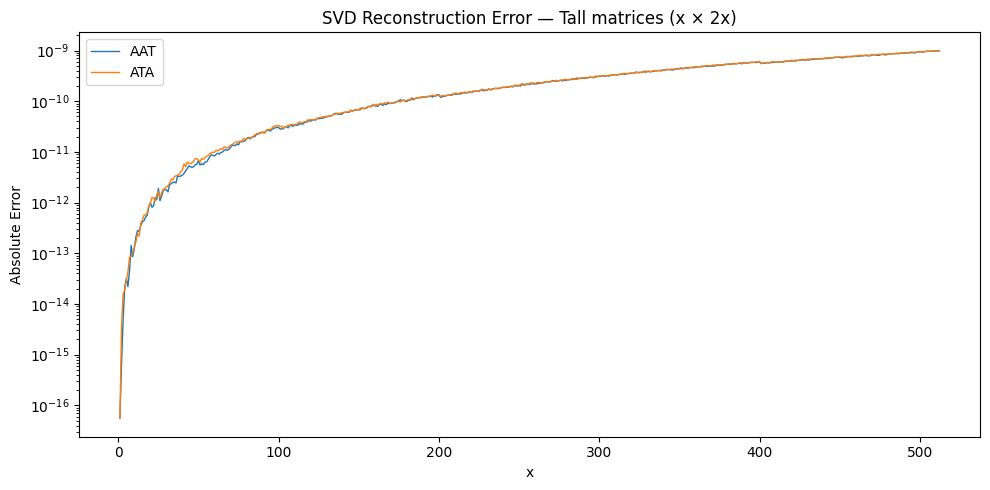

In [58]:
test_range(lambda x: (x, 2*x), "Tall matrices (x × 2x)", max_size=512)

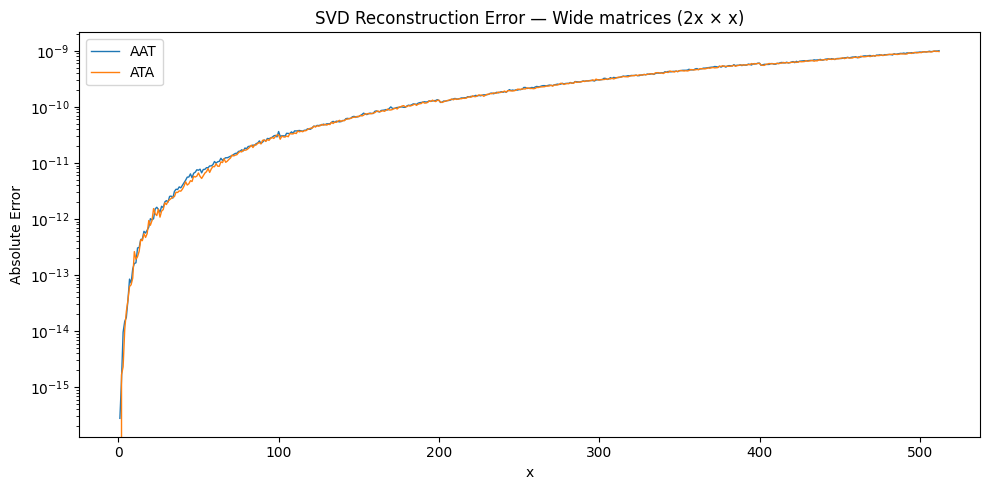

In [59]:
test_range(lambda x: (2*x, x), "Wide matrices (2x × x)", max_size=512)

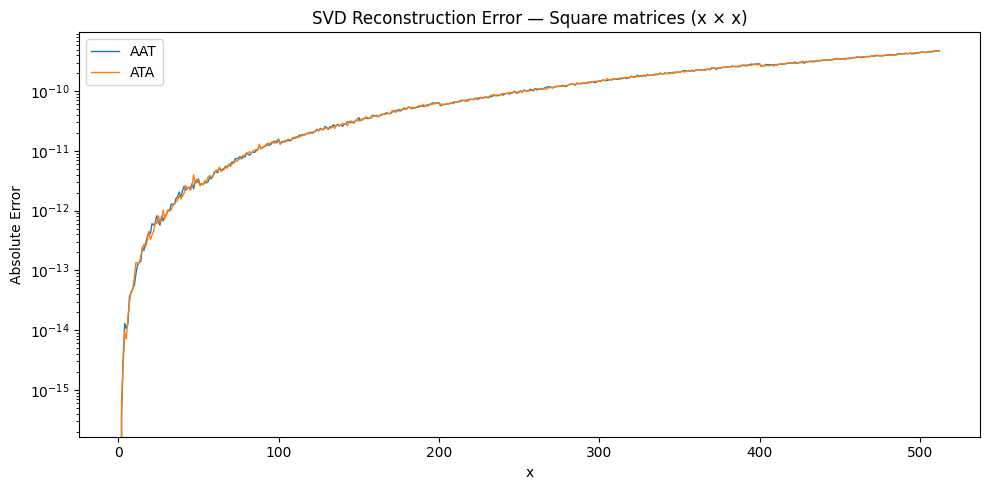

In [61]:
test_range(lambda x: (x, x), "Square matrices (x × x)", max_size=512)